In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('../Data/1645792390_cep1_dataset.xlsx')
df = pd.DataFrame(df)

In [4]:
# From the unique value table
num_var = ['age', 'restbps', 'chol', 'thalach', 'oldpeak']
cat_var = ['sex', 'cp', 'fast_bsug', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [24]:
df.columns = ['age', 'sex', 'cp', 'restbps', 'chol', 'fast_bsug', 'rest_ecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [25]:
df.columns

Index(['age', 'sex', 'cp', 'restbps', 'chol', 'fast_bsug', 'rest_ecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
cat_axis_name = ["Gender", "Chest Pain", "Fasting Blood Sugar", "resting ECG", "Exercise induced Angina", "Slope of ST Segment", "Number of Blood Vessels", "Thal", "Target"]

In [6]:
df["thal"] = df["thal"].replace(0, np.nan)
df['thal'].fillna(df["thal"].median(), inplace=True)

# Numeric Variables

In [7]:
num_var.append("target")

In [8]:
num_var

['age', 'restbps', 'chol', 'thalach', 'oldpeak', 'target']

In [9]:
num_axis = ['age', 'resting blood pressure', 'cholesterol level', 'thalach', 'oldpeak', 'has CVD']
print(len(num_axis), len(num_var))

6 6


In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1


In [11]:
df['restbps'] = df['trestbps']


In [12]:
df = df.drop('trestbps', axis=1)

In [13]:
df.head()

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,restbps
0,63,1,3,233,1,0,150,0,2.3,0,0,1.0,1,145
1,37,1,2,250,0,1,187,0,3.5,0,0,2.0,1,130
2,41,0,1,204,0,0,172,0,1.4,2,0,2.0,1,130
3,56,1,1,236,0,1,178,0,0.8,2,0,2.0,1,120
4,57,0,0,354,0,1,163,1,0.6,2,0,2.0,1,120


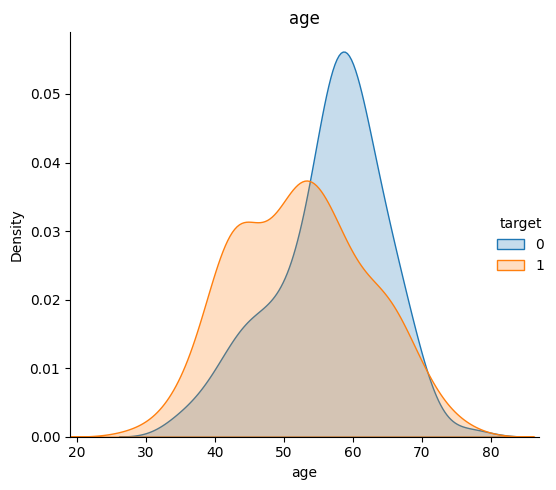

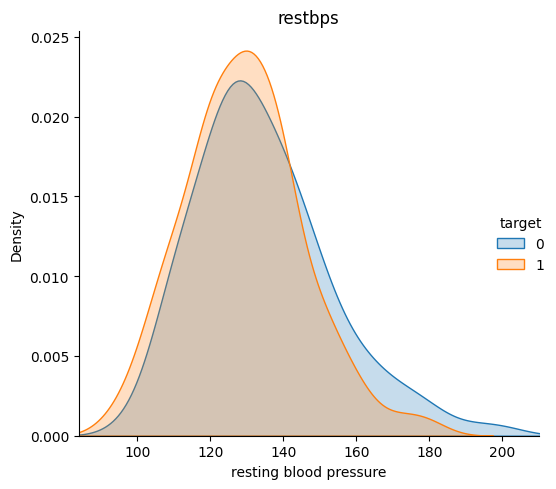

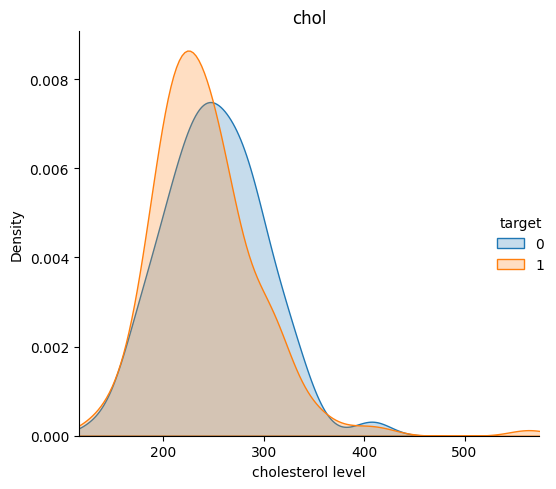

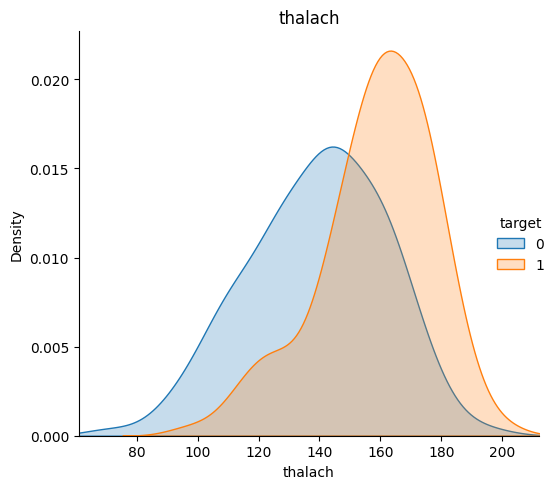

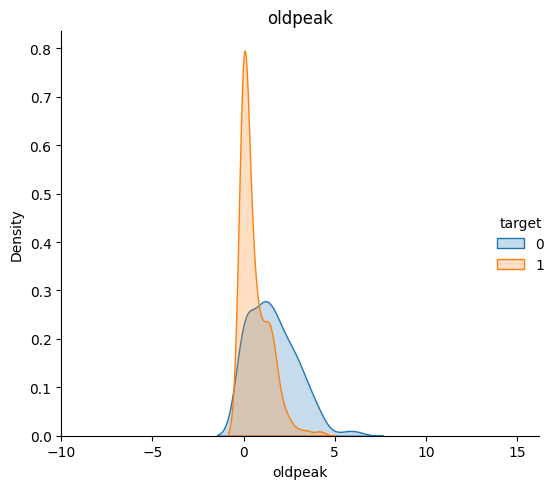

C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
C:\Users\alvancim\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


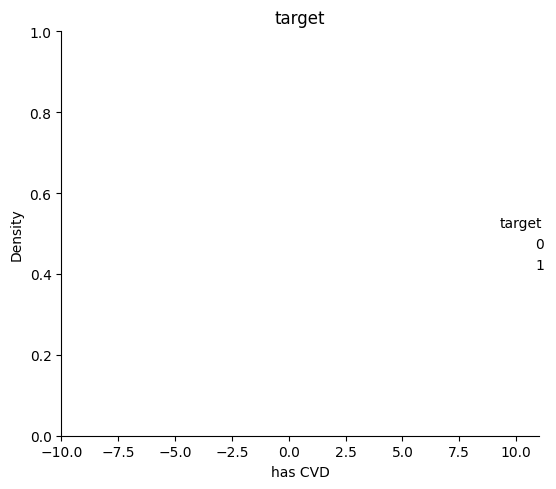

In [14]:
for i, z in list(zip(num_var, num_axis)):
    graph = sns.FacetGrid(df[num_var], hue='target', height=5, xlim = ((df[i].min()-10), (df[i].max()+10)))
    graph.map(sns.kdeplot, i, fill=True)
    graph.add_legend()

    plt.title(i)
    plt.xlabel(z)
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()

## Data Analysis
* the more the graphs overlap less variable influences target
* heart attack less likely to have cvd after 55yrs
* resting blood pressure, little correlation
* chol -- 200,300 cholesterol increases risk of heart attack
* thalach (max heart rate achieved) starting at 150 chance of heart attack increases
* oldpeak -- 0,1.5 critical to those high risk

In [15]:
df[num_var].corr()

,age,restbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
restbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [16]:
df[num_var].corr().iloc[:,[-1]]

,target
age,-0.225439
restbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


#### max heart rate (thalach) positive correlation, oldpeak negitive.  Other not well correlated to target

## Numerical Variables compared to eachother

In [17]:
num_var

['age', 'restbps', 'chol', 'thalach', 'oldpeak', 'target']

In [18]:
num_var.remove('target')

In [20]:
df[num_var].head()

,age,restbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


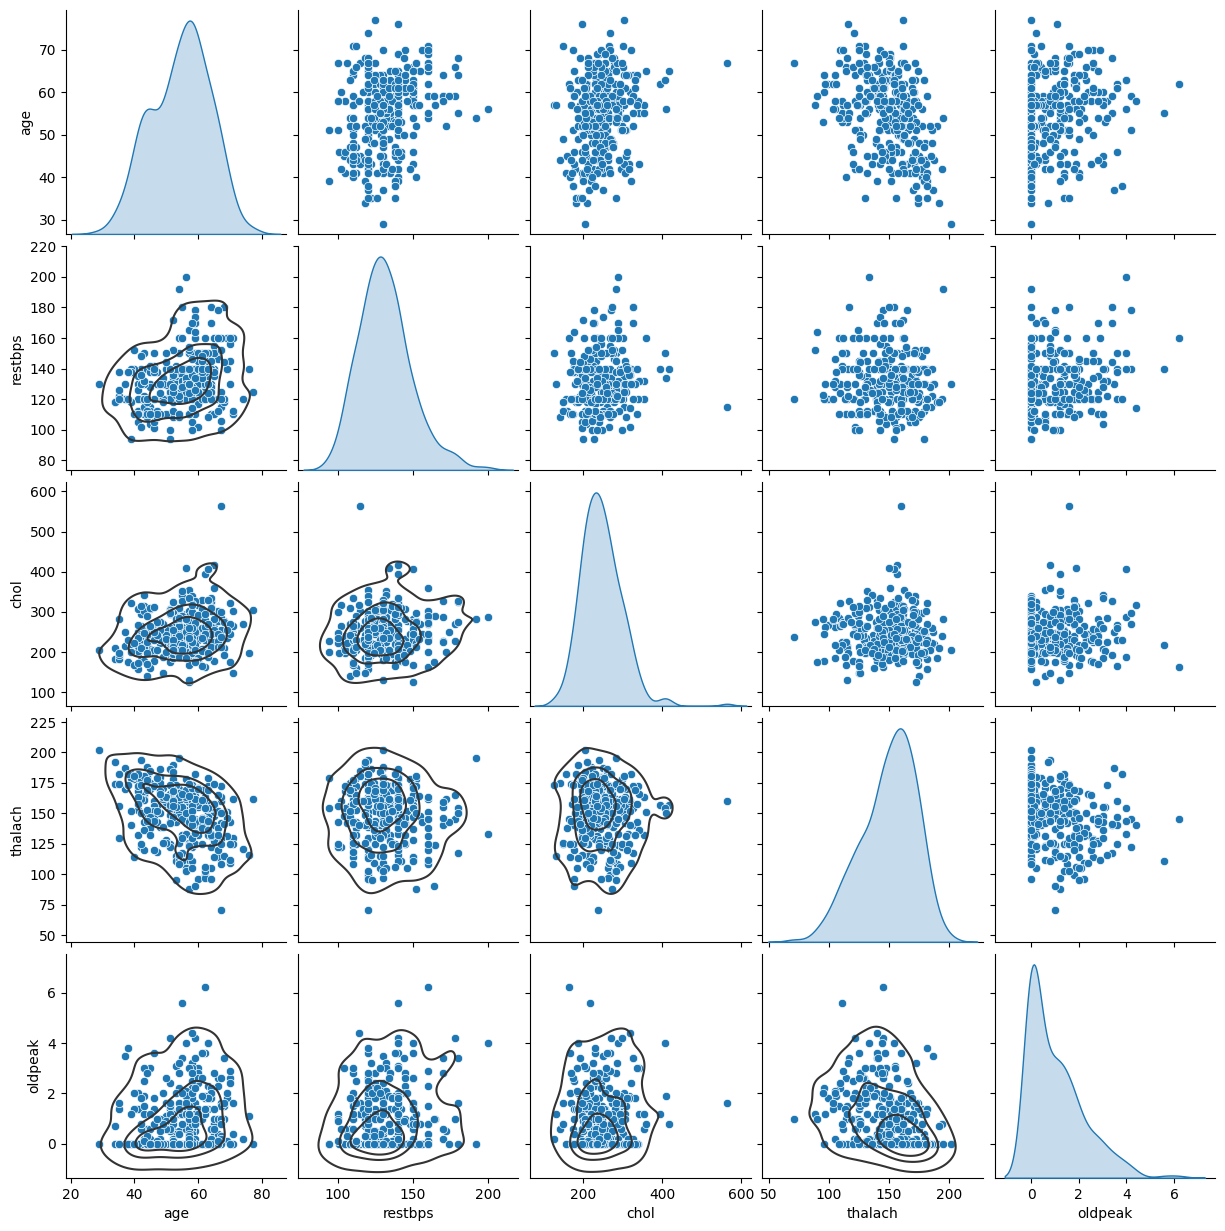

In [22]:
graph = sns.pairplot(df[num_var], diag_kind= 'kde')
graph.map_lower(sns.kdeplot, levels=4, color= '.2')

### Analyize numerical variable compared to each other
* Thalach correlates strongest to age
* 